In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import seaborn as sns


### Análisis de los Datos

In [3]:
#df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
# df = pd.read_csv("./datasets/day.csv")
df = pd.read_csv('./datasets/autos_mpg.csv')
cols = []

# Removing useless data
del df['car_name']
for col in df:
    cols.append(col)
    
    
    
df.head()
# cov_mat = np.cov(df)

# print(len(cov_mat), len(cov_mat[0]))
 
# temp_dict = {}

# for index_i, i in enumerate(df):
#     temp_dict[i] = cov_mat[index_i]
    
# cov_mat_w_headers = pd.DataFrame(temp_dict)

# cov_mat_w_headers.head(50)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [4]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### Pair plot para analizar las relaciones entre los datos

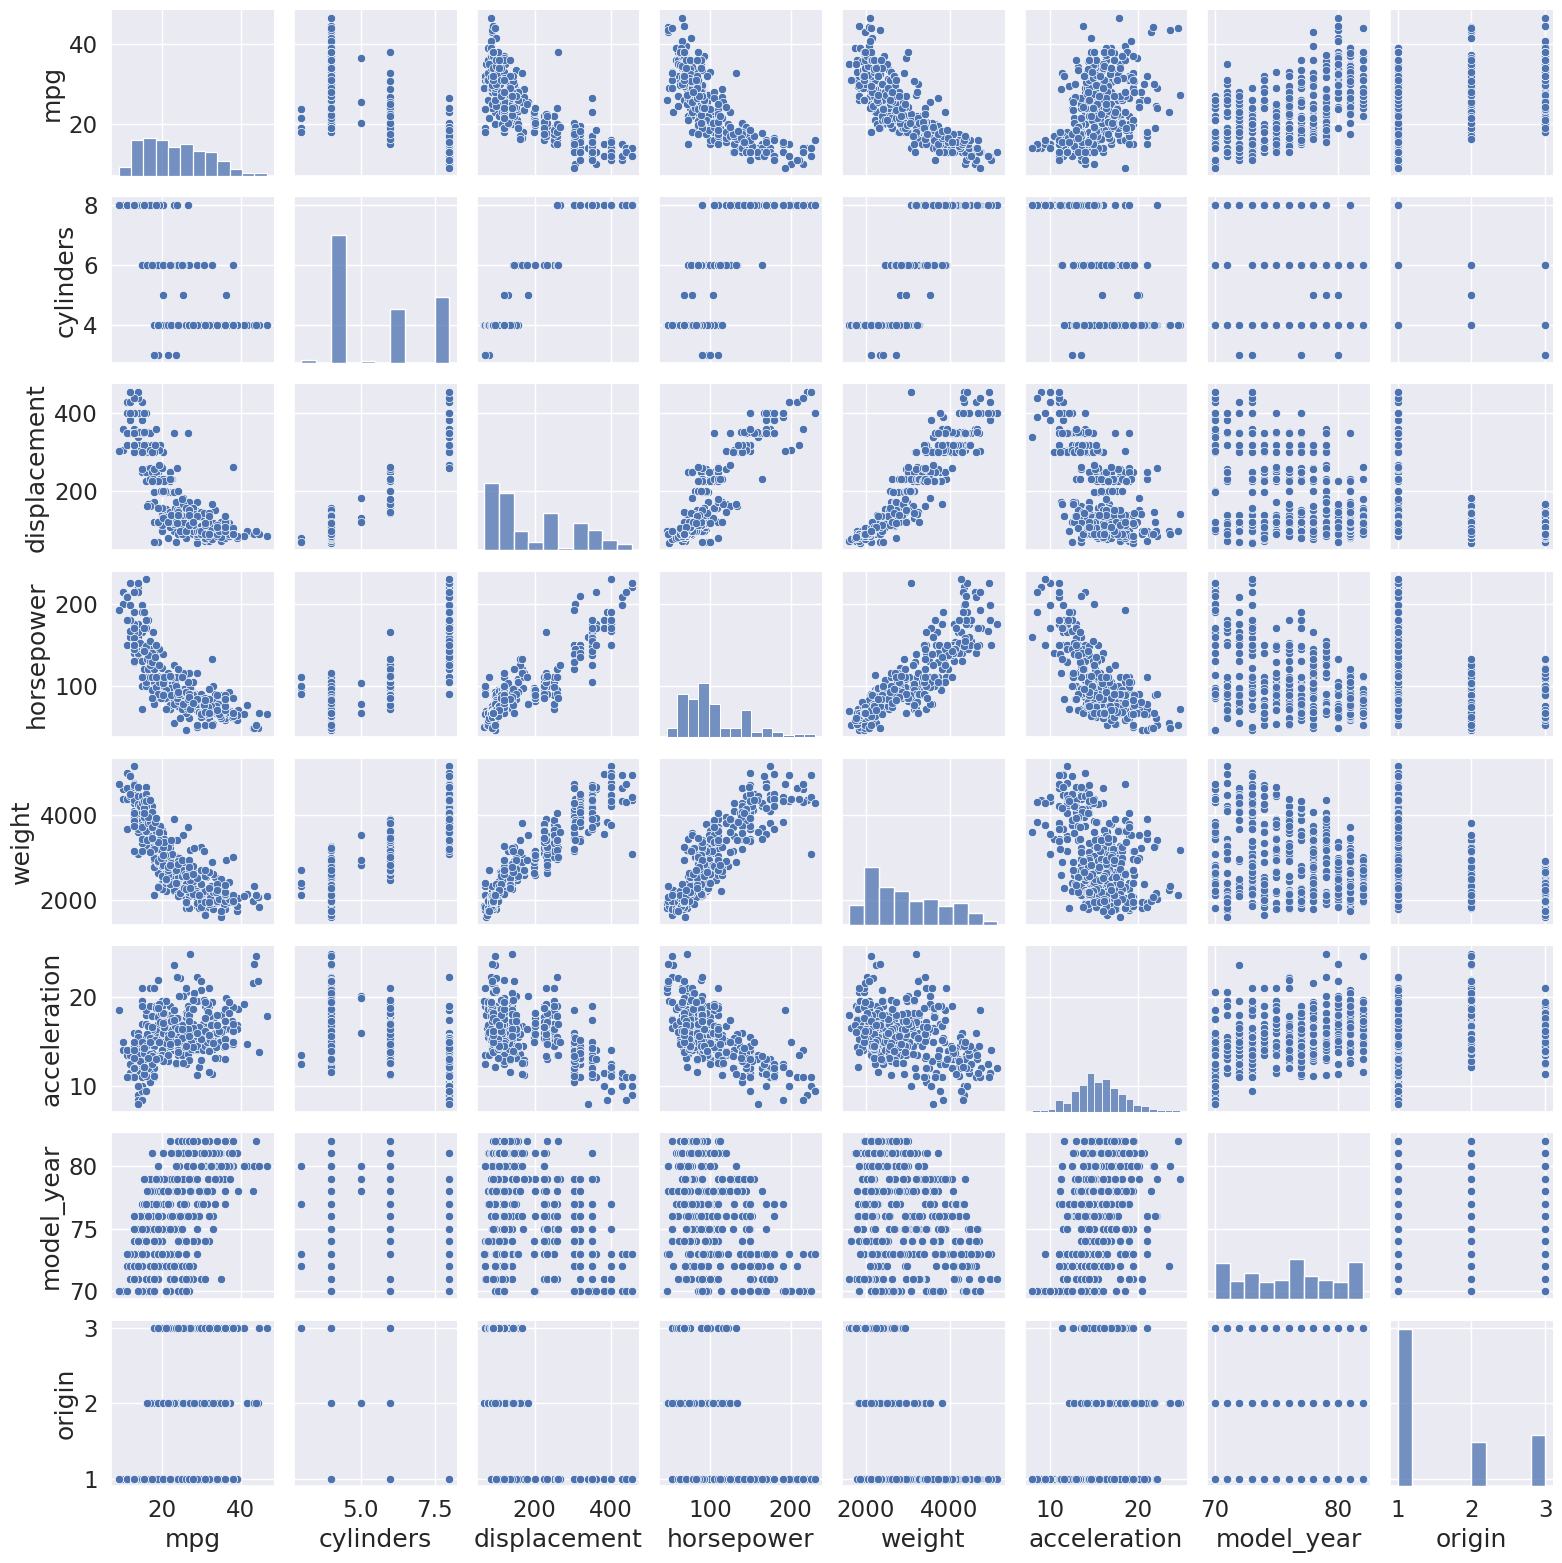

In [51]:
# Try not to re-run this. Takes about a minute to finish
sns.pairplot(df[cols], height=2.0)

### Matriz de covarianza expresada mediante un heatmap

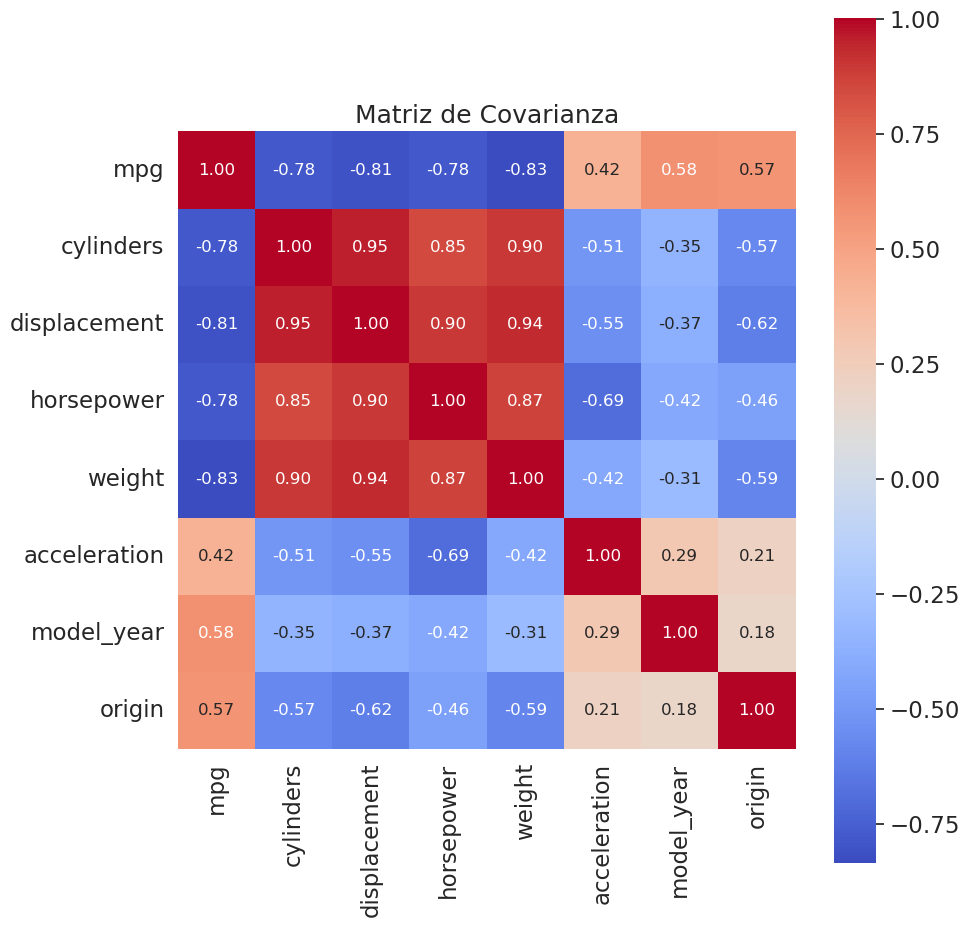

In [5]:
from sklearn.preprocessing import StandardScaler 

stdsc = StandardScaler() 
X_std = stdsc.fit_transform(df[cols].iloc[:,range(0,8)].values)

cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',                 
                 yticklabels=cols,
                 xticklabels=cols)
plt.title("Matriz de Covarianza", size = 18)
plt.tight_layout()
plt.show()

### Selección de features más relevantes para MPG
Para esto se escogieron los features con covarianza más fuerte. En este caso se escogieron valores con un mínimo de | 0.78 |.

In [6]:
cols_selected = ['mpg', 'weight', 'displacement', 'cylinders', 'horsepower']
  
df[cols_selected].head()

,mpg,weight,displacement,cylinders,horsepower
0,18.0,3504,307.0,8,130
1,15.0,3693,350.0,8,165
2,18.0,3436,318.0,8,150
3,16.0,3433,304.0,8,150
4,17.0,3449,302.0,8,140


In [7]:
X = (df['weight']-df['weight'].mean())/df['weight'].std() #standardization of the dataset
y = (df["mpg"]-df['mpg'].mean())/df["mpg"].std()

### Regresión Lineal

In [8]:
class LinearRegression:
    
    def __init__(self, n_features):
        self.W = np.random.normal(-1,1,(n_features,1)) #weights
        self.b = np.random.rand(1) #intercept
        
    def descent(self, delta_W, delta_b, learning_rate):
        #updating the weights with the calculated gradients
        self.W -= learning_rate*delta_W                                                                  
        self.b -= learning_rate*delta_b 
        
    def derivatives(self, X, Y):
        #partial derivative of cost w.r.t the weights
        delta_W = np.sum(np.multiply(((np.matmul(X,self.W)+self.b)-Y), X))*2/X.shape[0] 
        #partial derivative of cost w.r.t the intercept
        delta_b = np.sum(((np.matmul(X,self.W)+self.b)-Y))*2/X.shape[0]                
        return delta_W, delta_b
    
    #fit
    def train(self, X, Y, epochs=50, learning_rate=0.1):
        X = np.array(X).reshape(-1,1)
        Y = np.array(Y).reshape(-1,1)

              
        for i in range(epochs):
            
            delta_W, delta_b = self.derivatives(X, Y)
            self.descent(delta_W, delta_b, learning_rate)
            
            
            
        return self.W, self.b

    def predict(self, X):
        print(X.shape, X.reshape(-1,1).shape)
        product = np.matmul(np.array(X).reshape(-1,1),self.W)+self.b
        return product
    
    

In [9]:
X = (X-X.mean())/X.std() #Feature Engeneering: Standarization 
y = (y-y.mean())/y.std()
X.shape, y.shape

((392,), (392,))

In [10]:
reg = LinearRegression(n_features=1)

[-0.83224421] -2.293329883335049e-17
(392,) (392, 1)


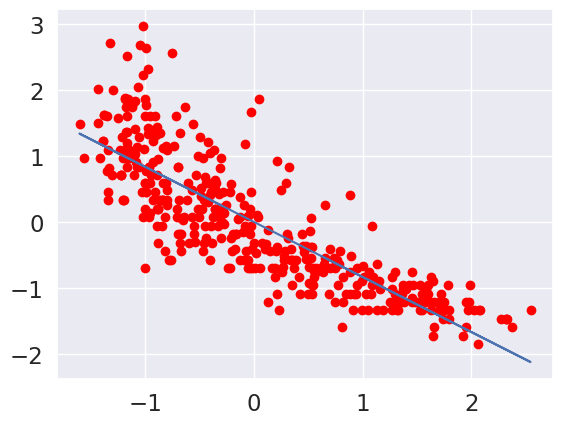

In [11]:
params = reg.train(X, y, epochs=80, learning_rate=0.225)
print(params[0][-1], params[1][-1])
plt.scatter(X[:500], y[:500], color='red')
pred = reg.predict(np.array(X[:500]))
plt.plot(X[:500], pred[:500])